In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Create data

In [5]:
def plot_results(iteration):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    all_probs = forward(evaldf[features], W)
    
    all_preds = (all_probs > 0.5).astype(np.int)
    evaldf['pred'] = all_preds

    # actual
    traindf.query('y==0').plot.scatter('f1', 'f2', ax=ax1, label='0')    
    ax1 = traindf.query('y==1').plot.scatter('f1', 'f2', ax=ax1, color='red', label='1')
    ax1.set_title('actual')
    ax1.legend()

    # predicted
    try:
        ax=evaldf.query('pred==0').plot.scatter('f1', 'f2', ax=ax2)
    except:
        print('no neg labels')

    try:
        ax=evaldf.query('pred==1').plot.scatter('f1', 'f2', ax=ax2, color='red')
    except:
        print('no pos labels')
    print(iteration)
    t = ax.text(0.9, 0.9, iteration, fontsize=12)
    t.set_bbox(dict(facecolor='white', edgecolor='grey'))

    fig.savefig('results/images/step_{}'.format(str(step).zfill(4)))
    plt.close()

/home/linux-chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


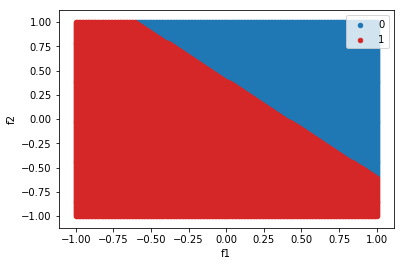

In [235]:
import seaborn as sns

n = 200
x = np.linspace(-1, 1, n)
y = x

# build indep variables
cartesian_xy = np.array([[x0, y0] for x0 in x for y0 in y])
df_data = pd.DataFrame(cartesian_xy, columns=['f1','f2'])

# space
xor = (df_data.f1 > 0).astype(np.int) ^ (df_data.f2 > 0).astype(np.int)
diag_line = ((df_data.f2 + df_data.f1 < .4)).astype(int)
vertical_stripe = ((df_data.f1 > -.2) & (df_data.f1 < 0.6)).astype(int)
horizontal_stripe = ((df_data.f2 > -.6) & (df_data.f2 < 0.6)).astype(int)
box = (vertical_stripe & horizontal_stripe).astype(int)
sinwave = ((df_data.f2 < .3+.8*np.sin(2*df_data.f1))).astype(int)
sinwave = ((df_data.f2 < -.5 + np.sin(1.5+2*df_data.f1))).astype(int)

# build dep variable
df_data['y'] = diag_line
# mix order
df = df_data.sample(frac=1.)

# plot distribution
blue = sns.color_palette()[0]
red = sns.color_palette()[3]
grid = df_data[['f1','f2','y']].as_matrix().reshape(n,n,3)
ax=df.query('y==0').plot.scatter('f1', 'f2',
                                 color=blue,
                                 label='0')
df.query('y==1').plot.scatter('f1', 'f2',
                              ax=ax,
                              color=red,
                              label='1')
plt.legend()

In [4]:
'4'.zfill(4)

'0004'

In [117]:
diag_line.name

In [239]:
!rm -r results/images
!mkdir results/images

def _sigmoid(logits):
    return 1/(1 + np.exp(-logits))

def forward(X, W):
    logits = np.dot(X, W)
    return _sigmoid(logits)[:,0]

def gradient(X, y, pred):
    return np.dot((pred - y), X).T/y.shape[0]

def get_next_batch(df, start, end):
    if end > df.shape[0]:
        df = df.sample(frac=1.)
        start = 0
        end = BATCH_SIZE
    return df.iloc[start:end,:][features], df.iloc[start:end]['y']

def cross_entropy(y_pred, y):
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

def add_features(_df):
    df = _df.copy()
#     df['f1f2'] = df['f1'] * df['f2']
#     df['f1+f2'] = df['f1'] + df['f2']
#     df['f1_2'] = df['f1']**2
#     df['f2_2'] = df['f2']**2 
#     df['f1_3'] = df['f1']**3 
#     df['f2_3'] = df['f2']**3 
#     df['f1_div_f2'] = df['f1'] / df['f2']
#     df['bias'] = 1
    return df



BATCH_SIZE = 100
STEPS = 420
LEARNING_RATE = 1


in_train_set = np.random.rand(len(df)) < 0.95
traindf = add_features(df)[in_train_set]
evaldf = add_features(df)[~in_train_set]
features = traindf.columns.drop('y')#.tolist()
N_FEATURES = len(features)




# initialize
start = 0
end = BATCH_SIZE
W = np.random.random([N_FEATURES, 1])
dw = 0
losses = []
for step in range(STEPS):
    
    if step % 20 ==0:
        plot_results(step)
        
    X_batch, y_batch = get_next_batch(traindf, start, end)
    pred = forward(X_batch, W)
    dw = gradient(X_batch, y_batch, pred).reshape(N_FEATURES,1) 
    W -= LEARNING_RATE*dw
    
    start += BATCH_SIZE
    end += BATCH_SIZE
    LEARNING_RATE *= .99
    losses.append(cross_entropy(pred, y_batch).mean())

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400


## to GIF

In [240]:
!convert -delay 20 -loop 0 results/images/*.png results/diag.gif

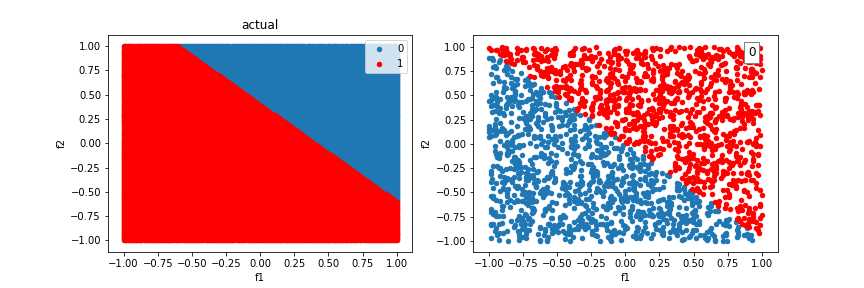

In [241]:
from IPython.display import Image
Image(filename="results/diag.gif")

## Titanic

In [196]:
titanic = sns.load_dataset('titanic')

def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]
    
# source: https://gist.github.com/mwaskom/8224591    
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
# titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
# titanic["adult_male"] = titanic.who == "man"
# titanic["deck"] = titanic.cabin.str[0].map(lambda s: np.nan if s == "T" else s)
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic["alive"] = titanic.survived.map({0: "no", 1: "yes"})
titanic["alone"] = ~(titanic.parch + titanic.sibsp).astype(int)
titanic["is_child"] = (titanic.age < 15).astype(int)

titanic = titanic.rename(columns={'sibsp': '# siblings aboard'})
titanic = titanic.drop(['alive', 'who'], axis=1)

df = pd.get_dummies(titanic)#.fillna(-1)
df.age = df.age.fillna(df.age.median())
df = df.drop('adult_male', axis=1)
df = df.rename(columns={'survived': 'y'})
df = df[['y', 'is_child', '# siblings aboard', 'pclass', 'sex_male']]
msk = np.random.rand(len(df)) < 0.8
_traindf = df[msk]
_evaldf = df[~msk]
# def train_test(df):
#     features2drop = ['survived'] + ['sex_male', 'adult_male']
#     X = df.drop(features2drop, axis=1)
#     y = df['survived']
#     return X,y

# X_train, y_train = train_test(traindf)
# X_eval, y_eval = train_test(evaldf)

In [197]:

def cross_columns(df, column_one, cross_columns_starts_with):
    _df = df.copy()
    columns_to_cross_with = _df.columns[_df.columns.str.startswith(cross_columns_starts_with)]
    for column in columns_to_cross_with:
        cross_col = ('{}_x_{}'.format(column_one, column))
        _df[cross_col] = _df[column_one] * _df[column]
    return _df 

In [234]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def add_features(_df):
    df = _df.copy()
#     df = cross_columns(df, column_one, cross_columns_starts_with)  
#     df['child_siblings'] = df.is_child * df['# siblings aboard']
#     df['bias'] = 1
    return df

def normalize(df):
    return (df-df.mean())/df.std()


BATCH_SIZE = 100
STEPS = 300
LEARNING_RATE = 0.01

def train():

    msk = np.random.rand(len(df)) < 0.8
    _traindf = df[msk]
    _evaldf = df[~msk]

    # in_train_set = np.random.rand(len(df)) < 0.95
    traindf = add_features(_traindf)
    evaldf = add_features(_evaldf)
    features = traindf.columns.drop('y')#.tolist()
    N_FEATURES = len(features)

    traindf[features] = normalize(traindf[features])
    evaldf[features] = normalize(evaldf[features])


    LEARNING_RATE = 0.01
    # initialize
    start = 0
    end = BATCH_SIZE
    W = np.random.random([N_FEATURES, 1])*0.001
    dw = 0
    losses = []
    for step in range(STEPS):
        X_batch, y_batch = get_next_batch(traindf, start, end)
        pred = forward(X_batch, W)
        dw = gradient(X_batch, y_batch, pred).reshape(N_FEATURES,1) 
        W -= LEARNING_RATE*dw

        start += BATCH_SIZE
        end += BATCH_SIZE
        LEARNING_RATE *= .99
        losses.append(cross_entropy(pred, y_batch).mean())
    return roc_curve(y_batch, pred)

results = []
for i in range(100):
    results.append(train())

Text(0.5,1,'0.8341913341913343')

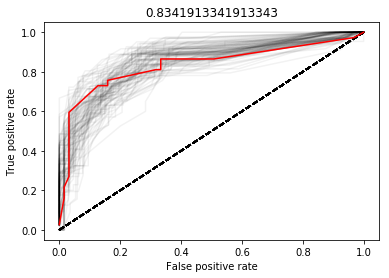

In [233]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def plot_roc(ax, fpr, tpr, **kwargs):
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr, **kwargs)
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.set_title('ROC curve')

fig, ax = plt.subplots(1,1)
fprs = []
tprs = []
for r in results:
    fpr, tpr, _ = r
    plot_roc(ax, fpr, tpr, color='black', alpha=0.05)   
    fprs.extend(fpr.tolist())
    tprs.append(tpr.tolist())
plot_roc(ax, fpr, tpr, alpha=1, color='blue')
plt.title(auc(fpr, tpr))

Text(0.5,1,'0.8852831748656469')

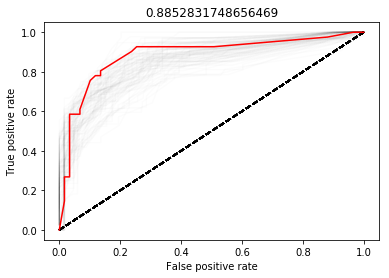

In [230]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def plot_roc(ax, fpr, tpr, **kwargs):
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fpr, tpr, **kwargs)
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.set_title('ROC curve')

fig, ax = plt.subplots(1,1)
fprs = []
tprs = []
for r in results:
    fpr, tpr, _ = r
    plot_roc(ax, fpr, tpr, color='black', alpha=0.01)   
    fprs.extend(fpr.tolist())
    tprs.append(tpr.tolist())
plot_roc(ax, fpr, tpr, alpha=1, color='red')
plt.title(auc(fpr, tpr))

In [ ]:
roc_auc_score

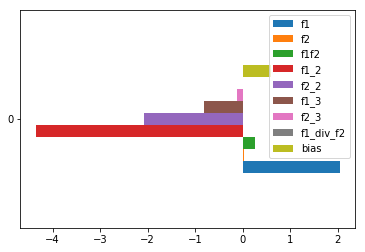

In [5]:
_df = pd.DataFrame(W.T, columns=features)
_df.plot(kind='barh', )

bias value?

## Train network

/Users/crawles/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


,f1,f2,f1f2,f1_2,f2_2,bias,pred
count,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000
mean,0.000000e+00,7.098766e-17,1.354472e-18,0.340067,0.340067,1.0,0.692700
std,5.831821e-01,5.831821e-01,3.400843e-01,0.304135,0.304135,0.0,0.461398
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000102,0.000102,1.0,0.000000
25%,-5.000000e-01,-5.000000e-01,-1.902357e-01,0.063769,0.063769,1.0,0.000000
50%,5.551115e-17,5.551115e-17,-5.556536e-19,0.255178,0.255178,1.0,1.000000
75%,5.000000e-01,5.000000e-01,1.902357e-01,0.573921,0.573921,1.0,1.000000
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.0,1.000000


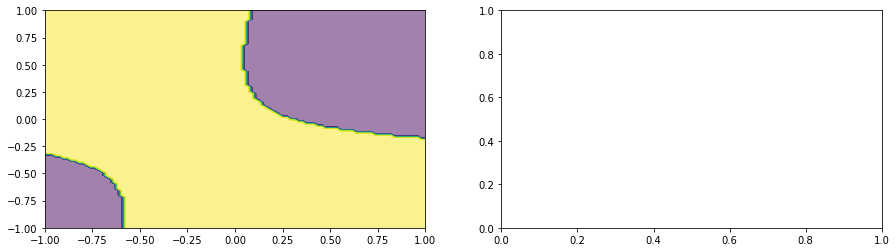

In [166]:
# # grid
# n = 100
# minv, maxv = -1,1
# x = np.linspace(minv, maxv, n)
# y = np.linspace(minv, maxv, n)
# cartesian_xy = np.array([[x0, y0] for x0 in x for y0 in y])
# df_data = pd.DataFrame(cartesian_xy, columns=['f1','f2'])
# df_data = add_features(df_data)
# evaldf = df_data

# all_probs = forward(evaldf[features], W)

# all_preds = (all_probs > 0.5).astype(np.int)
# evaldf['pred'] = all_preds

# # contour
# grid = evaldf[['f1','f2','pred']].as_matrix().reshape(n,n,3)
# fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,4))
# x,y,z = grid[:,:,0], grid[:,:,1], grid[:,:,2]
# h = ax1.contourf(x, y, z, alpha=0.5,
#                  levels=np.linspace(0,1,30),
#                  linewidth=0)  
# evaldf.describe()
# # plt.show()

In [64]:
def _sigmoid(net_ij):
    return 1/(1 + np.exp(-net_ij))

def forward(X, W):
    logits = np.dot(X, W)
    return _sigmoid(logits)[:,0]

def gradient(X, y, pred):
    return np.dot((pred - y), X).T/y.shape[0]

def get_next_batch(df):
    return df.iloc[start:end,:][features], df.iloc[start:end]['y']


def cross_entropy(y_pred, y):
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

# def gradient(y, xent, X):
#     return np.dot((y_batch - xent), X_batch)


def update(W, grad, learning_rate):
    return W + learning_rate*grad[:, None]


In [31]:
W.shape

(2, 1)

/Users/crawles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

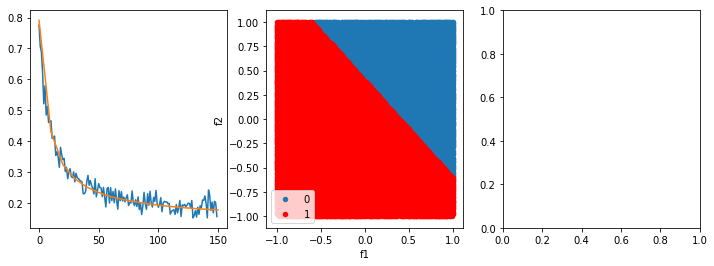

In [38]:
# !rm results/*

# BATCH_SIZE = 100
# N_OUTPUTS = 1

# def add_features(df):
#     df['f1f2'] = df['f1'] * df['f2']
#     df['f1_2'] = df['f1']**2
#     df['f2_2'] = df['f2']**2 
#     df['bias'] = 1
#     return df


# msk = np.random.rand(len(df)) < 0.8
# traindf = add_features(df)[msk]
# evaldf = add_features(df)[~msk]

# features = df.columns.tolist()[:2]
# features = ['f1','f2','bias']
# W_init = np.random.random([len(features), N_OUTPUTS])



# evalX, evaly = evaldf[features], evaldf['y']
# N_STEPS = 400
# LEARNING_RATE = 1

# # initialize
# start = 0
# end = BATCH_SIZE
# train_losses, test_losses, loss_axis = [], [], []
# W = W_init.copy()

# when_to_eval = 10

# for i in range(N_STEPS):
#     if end > traindf.shape[0]:
#         end = BATCH_SIZE
#         start=0
#     LEARNING_RATE = LEARNING_RATE*.99

#     X_batch, y_batch = get_next_batch(traindf)
    
#     pred = forward(X_batch, W)
    
    
#     if i % when_to_eval == 0:
#         fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,4))
        
#         all_probs = forward(evalX[features], W)
#         all_preds = (all_probs > 0.5).astype(np.int)
#         evaldf['pred'] = all_preds
        
#         loss_axis.append(i)
#         xent = cross_entropy(all_probs, evaly)
#         test_losses.append(xent.mean())

#         ax0.plot(train_losses)
#         ax0.plot(loss_axis, test_losses)


#         # actual
#         traindf.query('y==0').plot.scatter('f1', 'f2', ax=ax1, label='0')
#         traindf.query('y==1').plot.scatter('f1', 'f2', ax=ax1, color='red', label='1')
#         ax1.set_title('actual')
#         ax1.legend()

#         try:
#             ax=evaldf.query('pred==0').plot.scatter('f1', 'f2', ax=ax2)
#         except:
#             print('no neg labels')

#         try:
#             evaldf.query('pred==1').plot.scatter('f1', 'f2', ax=ax2, color='red')
#         except:
#             print('no pos labels')
    
#         # plot boundry
#         data = np.linspace(-1,1,100)
# #         boundry = -(W[0]*data + W[2])/W[1]
# #         boundry = -(W[0]*data + W[2]*data + W[3])/W[1]

# #         ax2.plot(data, boundry, linewidth=3, color='black', linestyle='dashed')
#         fig.savefig('results/step_{}'.format(i))
#         plt.close()
        
#     xent = cross_entropy(pred, y_batch)
#     train_losses.append(xent.mean())
    
# #     g = gradient(y_batch, xent, X_batch)
#     g = gradient(X_batch, y_batch, pred)
#     W = update(W, -g, LEARNING_RATE)
    
#     # next batch
#     start += BATCH_SIZE
#     end += BATCH_SIZE
    

# # fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,4))


In [56]:
# N_EXAMPLES = 1000
# N_FEATURES = 2
# SEED = 4
# np.random.seed(SEED)

# def random_quadrant(n, q=(1,1)):
#     pos = np.random.rand(n, N_FEATURES)
#     pos = np.random.rand(n, N_FEATURES) -np.random.rand(n, N_FEATURES)*.1
#     return pos * np.array(q)

# # pos
# X = random_quadrant(N_EXAMPLES, q=(-1,-1))
# y = np.ones(N_EXAMPLES)


# quadrants = ((1,-1), (1,1), (-1,1))
# xor = (0, 1,0 )
# linear = (1, 0,0 )
# labels = xor
# for q,l in zip(quadrants, labels):
#     X = np.vstack([X, random_quadrant(N_EXAMPLES, q=q)])
#     y = np.hstack([y, l*np.ones(N_EXAMPLES)]).astype(np.int)

# # X[:,1] += 0.25
# # X[:,0] *= abs(X[:,1])
# import pandas as pd
# df = pd.DataFrame(X, columns=['f1', 'f2'])
# df['y'] = y

# df = df.sample(frac=1.)
# ax=df.query('y==0').plot.scatter('f1', 'f2')
# df.query('y==1').plot.scatter('f1', 'f2', ax=ax, color='red')


In [50]:
evaldf.shape

(8110, 8)

In [111]:
df_grid

,f1,f2,f1f2,bias
0,-1.0,-1.000000,1.000000,1
1,-1.0,-0.979798,0.979798,1
2,-1.0,-0.959596,0.959596,1
3,-1.0,-0.939394,0.939394,1
4,-1.0,-0.919192,0.919192,1
5,-1.0,-0.898990,0.898990,1
6,-1.0,-0.878788,0.878788,1
7,-1.0,-0.858586,0.858586,1
8,-1.0,-0.838384,0.838384,1
9,-1.0,-0.818182,0.818182,1


In [108]:
import seaborn as sns

n = 100
minv, maxv = -1,1
x = np.linspace(minv, maxv, n)
y = np.linspace(minv, maxv, n)
cartesian_xy = np.array([[x0, y0] for x0 in x for y0 in y])
df_grid = pd.DataFrame(cartesian_xy, columns=['f1','f2'])
df_grid['f1f2'] = df_grid['f1'] * df_grid['f2']
df_grid['bias'] = 1
df_grid['pred'] = forward(df_grid[features], W)

grid = df_grid[['f1','f2','pred']].as_matrix().reshape(n,n,3)

#

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,4))
x,y,z = grid[:,:,0], grid[:,:,1], grid[:,:,2]
h = ax1.contourf(x, y, z, alpha=0.5,
                 levels=np.linspace(0,1,30),
                 linewidth=0)
evaldf.query('pred==0').plot.scatter('f1', 'f2', ax=ax1, color='white')
evaldf.query('pred==1').plot.scatter('f1', 'f2', ax=ax1, color='grey')

# xx.shape

KeyError: "Index(['f1_2', 'f2_2', 'f1_3', 'f2_3'], dtype='object') not in index"

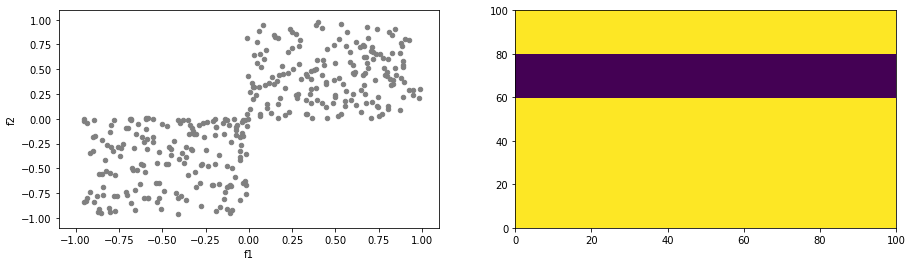

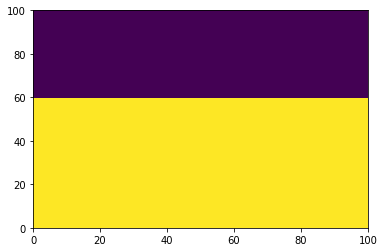

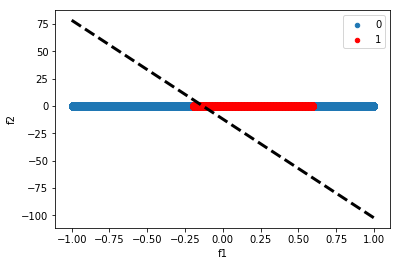

In [6]:
# actual
ax= traindf.query('y==0').plot.scatter('f1', 'f2', label='0')
traindf.query('y==1').plot.scatter('f1', 'f2', ax=ax,color='red', label='1')

data = np.linspace(-1,1,100)
boundry = -(W[0]*data + W[2])/W[1]
ax.plot(data, boundry, linewidth=3, color='black', linestyle='dashed')

In [501]:
W = np.random.random([len(features), N_OUTPUTS])
W

array([[ 0.64201279],
       [ 0.33281506],
       [ 0.22323949]])

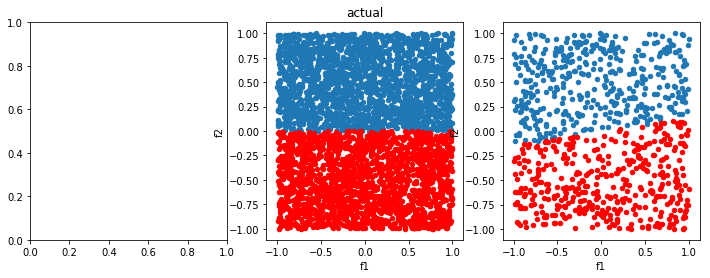

In [389]:


ax=evaldf.query('pred==0').plot.scatter('f1', 'f2', ax=ax2)
try:
    evaldf.query('pred==1').plot.scatter('f1', 'f2', ax=ax2, color='red')
except:
    print('no pos labels')

# # pred
# ax=df.query('pred==0').plot.scatter('f1', 'f2', ax=ax2)
# try:
#     df.query('pred==1').plot.scatter('f1', 'f2', ax=ax2, color='red')
# except:
#     print('no pos labels')
# ax2.set_title('predicted')

In [4]:
value = .3
def bucketize_col(df, col):
    n_buckets = 5
    bounds = np.linspace(-1,1,n_buckets)
    df_bounds = pd.DataFrame([(bounds[i], bounds[i+1]) for i in range(n_buckets-1)], columns=['lower','upper'])
    def get_bucket(value):
        return df_bounds.apply(lambda row: row.lower < value < row.upper, axis=1).values.astype(int)
    return np.array([get_bucket(v) for v in df[col]])

def cross_row(x0, y0):
    return (x0.T*y0.reshape(4,1)).reshape(4*4)

f1_bucket = bucketize_col(df, 'f1')
f2_bucket = bucketize_col(df, 'f2')
cross = pd.DataFrame([cross_row(x0, y0) for x0, y0 in zip(f1_bucket, f2_bucket)])
df.reset_index(drop=True).merge(cross, left_index=True, right_index=True)


array([-1.        , -0.98994975, -0.9798995 , -0.96984925, -0.95979899,
       -0.94974874, -0.93969849, -0.92964824, -0.91959799, -0.90954774,
       -0.89949749, -0.88944724, -0.87939698, -0.86934673, -0.85929648,
       -0.84924623, -0.83919598, -0.82914573, -0.81909548, -0.80904523,
       -0.79899497, -0.78894472, -0.77889447, -0.76884422, -0.75879397,
       -0.74874372, -0.73869347, -0.72864322, -0.71859296, -0.70854271,
       -0.69849246, -0.68844221, -0.67839196, -0.66834171, -0.65829146,
       -0.64824121, -0.63819095, -0.6281407 , -0.61809045, -0.6080402 ,
       -0.59798995, -0.5879397 , -0.57788945, -0.5678392 , -0.55778894,
       -0.54773869, -0.53768844, -0.52763819, -0.51758794, -0.50753769,
       -0.49748744, -0.48743719, -0.47738693, -0.46733668, -0.45728643,
       -0.44723618, -0.43718593, -0.42713568, -0.41708543, -0.40703518,
       -0.39698492, -0.38693467, -0.37688442, -0.36683417, -0.35678392,
       -0.34673367, -0.33668342, -0.32663317, -0.31658291, -0.30

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
df.reset_index(drop=True).merge()

,f1,f2,y
0,-0.738693,0.025126,0
1,0.065327,0.336683,1
2,-0.407035,0.427136,0
3,-0.718593,0.025126,0
4,-0.899497,-0.567839,1
5,-0.708543,-0.819095,1
6,0.417085,-0.226131,1
7,0.246231,0.788945,0
8,-0.125628,-0.336683,1
9,0.025126,0.527638,0


,f1,f2,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.738693,0.025126,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.065327,0.336683,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.407035,0.427136,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.718593,0.025126,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.899497,-0.567839,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-0.708543,-0.819095,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.417085,-0.226131,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0.246231,0.788945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,-0.125628,-0.336683,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0.025126,0.527638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [293]:
df.query('pred==1').plot.scatter('f1', 'f2', ax=ax2, color='red')


ValueError: scatter requires x column to be numeric

In [ ]:
#

# value = .3
# def bucketize_col(df, col):
#     n_buckets = 5
#     bounds = np.linspace(-1,1,n_buckets)
#     df_bounds = pd.DataFrame([(bounds[i], bounds[i+1]) for i in range(n_buckets-1)], columns=['lower','upper'])
#     def get_bucket(value):
#         return df_bounds.apply(lambda row: row.lower < value < row.upper, axis=1).values.astype(int)
#     return np.array([get_bucket(v) for v in df[col]])

# def cross_row(x0, y0):
#     return (x0.T*y0.reshape(4,1)).reshape(4*4)

# f1_bucket = bucketize_col(df, 'f1')
# f2_bucket = bucketize_col(df, 'f2')
# cross = pd.DataFrame([cross_row(x0, y0) for x0, y0 in zip(f1_bucket, f2_bucket)])
# df = df.reset_index(drop=True).merge(cross, left_index=True, right_index=True)


# ax=df.query('y==0').plot.scatter('f1', 'f2', color='white', label='0')
# df.query('y==1').plot.scatter('f1', 'f2', ax=ax, color='grey', label='1')
# plt.legend()